In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE


In [2]:
#pip install sklearn

In [3]:
#pip install lime

In [4]:
#pip install mlxtend

In [5]:
#pip install xgboost

In [6]:
#read the data
houses= pd.read_csv('./Data/train.csv') 

In [7]:
#see the data
houses

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [8]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
#lets see if there are any columns with missing values 
null_columns=houses.columns[houses.isnull().any()]
houses[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
StreetDict =   {'Grvl':0,
                "Pave":1,
                }
houses['Ordinal_Street'] = houses.Street.map(StreetDict)

houses = houses.drop('Street', axis = 1)

In [11]:
#Converted Alley to binary. Since most streets had no alley access.
AlleyDict =   {'Grvl':1,
                "Pave":1,
               0:0
                }

houses['Alley'].fillna(0, inplace = True)

houses['Binary_Alley'] = houses.Alley.map(AlleyDict)

houses = houses.drop('Alley', axis = 1)

In [12]:
#Change BsmtCond to ordinal Data, also NA meant no basement we replaced those with the mean
#Because no basement is not necessarily worse than other conditions.
BsmtCondDict =   {'Ex':4,
                  'Gd':3,
                  'TA':2,
                  "Fa":1,
                  "Po":0,
                }
houses['Ordinal_BsmtCond'] = houses.BsmtCond.map(BsmtCondDict)
houses['Ordinal_BsmtCond'].fillna(houses['Ordinal_BsmtCond'].mean(), inplace = True)
      
houses = houses.drop('BsmtCond', axis = 1)

In [13]:
ExterQualDict =   {'Ex':4,
                  'Gd':3,
                  'TA':2,
                  "Fa":1,
                  "Po":0,
                }
houses['Ordinal_ExterQual'] = houses.ExterQual.map(ExterQualDict)
      
houses = houses.drop('ExterQual', axis = 1)

In [14]:
ExterCondDict =   {'Ex':4,
                  'Gd':3,
                  'TA':2,
                  "Fa":1,
                  "Po":0,
                }
houses['Ordinal_ExterCond'] = houses.ExterCond.map(ExterCondDict)
      
houses = houses.drop('ExterCond', axis = 1)

In [15]:
BsmtQualDict =   {'Ex':4,
                  'Gd':3,
                  'TA':2,
                  "Fa":1,
                  "Po":0,
                 }
houses['Ordinal_BsmtQual'] = houses.BsmtQual.map(BsmtQualDict)
houses['Ordinal_BsmtQual'].fillna(houses['Ordinal_BsmtQual'].mean(), inplace = True)
      
houses = houses.drop('BsmtQual', axis = 1)

In [16]:
# No basement scores were recorded as Na, which was confused as null value.
houses['BsmtExposure'].fillna("NoB", inplace = True)
houses['BsmtFinType1'].fillna(houses['BsmtFinType1'].mode(), inplace = True)
houses['BsmtFinType2'].fillna(houses['BsmtFinType2'].mode(), inplace = True)

In [17]:
HeatingQCDict =   {'Ex':4,
                  'Gd':3,
                  'TA':2,
                  "Fa":1,
                  "Po":0,
                }
houses['Ordinal_HeatingQC'] = houses.HeatingQC.map(HeatingQCDict)
      
houses = houses.drop('HeatingQC', axis = 1)

In [18]:
CentralAirDict = {'N':0,
                 "Y":1,
                 }
houses['Binary_CentralAir'] = houses.CentralAir.map(CentralAirDict)

houses = houses.drop('CentralAir', axis = 1)

In [19]:
KitchenQualDict =   {'Ex':4,
                  'Gd':3,
                  'TA':2,
                  "Fa":1,
                  "Po":0,
                }
houses['Ordinal_KitchenQual'] = houses.KitchenQual.map(KitchenQualDict)
      
houses = houses.drop('KitchenQual', axis = 1)

In [20]:
FireplaceQuDict =   {'Ex':4,
                  'Gd':3,
                  'TA':2,
                  "Fa":1,
                  "Po":0,
                 }
houses['Ordinal_FireplaceQu'] = houses.FireplaceQu.map(FireplaceQuDict)
houses['Ordinal_FireplaceQu'].fillna(houses['Ordinal_FireplaceQu'].mean(), inplace = True)
      
houses = houses.drop('FireplaceQu', axis = 1)

In [21]:
# NA means no garage.
houses['GarageType'].fillna("NoG", inplace = True)
houses['GarageYrBlt'].fillna(houses['GarageYrBlt'].mode(), inplace = True)


In [22]:
GarageQualDict =   {'Ex':4,
                  'Gd':3,
                  'TA':2,
                  "Fa":1,
                  "Po":0,
                 }
houses['Ordinal_GarageQual'] = houses.GarageQual.map(GarageQualDict)
houses['Ordinal_GarageQual'].fillna(houses['Ordinal_GarageQual'].mean(), inplace = True)
      
houses = houses.drop('GarageQual', axis = 1)

In [23]:
GarageCondDict =   {'Ex':4,
                  'Gd':3,
                  'TA':2,
                  "Fa":1,
                  "Po":0,
                 }
houses['Ordinal_GarageCond'] = houses.GarageCond.map(GarageCondDict)
houses['Ordinal_GarageCond'].fillna(houses['Ordinal_GarageCond'].mean(), inplace = True)
      
houses = houses.drop('GarageCond', axis = 1)

In [24]:
#Converted Pool Quality to binary. Since most houses had no Pool
PoolQCDict =   {'Ex':1,
                  'Gd':1,
                  'TA':1,
                  "Fa":1,
                0:0
                }

houses['PoolQC'].fillna(0, inplace = True)

houses['Binary_PoolQC'] = houses.PoolQC.map(PoolQCDict)

houses = houses.drop('PoolQC', axis = 1)

In [25]:
# No fence scores were recorded as Na, which was confused as null value.
houses['Fence'].fillna("NoF", inplace = True)

In [26]:
# No Masonry veneer type scores were recorded as Na, which was confused as null value.
houses['MasVnrType'].fillna("None", inplace = True)

In [27]:
# No basement fin scores were recorded as Na, which was confused as null value.
houses['Fence'].fillna("NoF", inplace = True)

In [28]:
#Converted Pool Quality to binary. Since most houses had no Pool
MiscFeatureDict =   {'Elev':1,
                  'Gar2':1,
                  'Othr':1,
                  "Shed":1,
                  "TenC":1,
                0:0
                }

houses['MiscFeature'].fillna(0, inplace = True)

houses['Binary_MiscFeature'] = houses.MiscFeature.map(MiscFeatureDict)

houses = houses.drop('MiscFeature', axis = 1)

In [29]:
# Handle numeric Na values.
houses['LotFrontage'].fillna(houses['LotFrontage'].mean(), inplace = True)
houses['MasVnrArea'].fillna(houses['MasVnrArea'].mean(), inplace = True)
houses['BsmtFinType1'].fillna(houses['BsmtFinType1'].mode(), inplace = True)
houses['BsmtFinType2'].fillna(houses['BsmtFinType2'].mode(), inplace = True)
houses['Electrical'].fillna(houses['Electrical'].mode(), inplace = True)
houses['GarageYrBlt'].fillna(houses['GarageYrBlt'].mean(), inplace = True)
houses['GarageFinish'].fillna(houses['GarageFinish'].mode(), inplace = True)


In [30]:
# Do one hot encoding for the rest of the categorical features
houses = pd.get_dummies(houses)
houses = houses.drop('Id', axis = 1)

Text(0.5, 6.79999999999999, 'Sale Price')

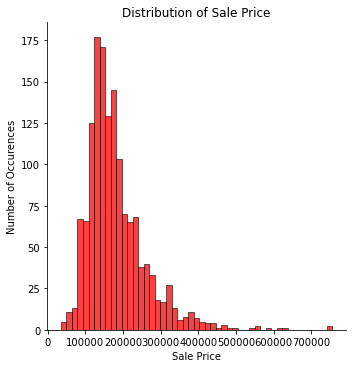

In [31]:
#plot of the sale numbers due to price
sns.displot(houses['SalePrice'], color="r")
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price")

In [32]:
#finding corelations of features with SalePrice
corr = houses.corr()['SalePrice']
corr[np.argsort(corr, axis = 0)[::-1]]

SalePrice              1.000000
OverallQual            0.790982
GrLivArea              0.708624
Ordinal_ExterQual      0.682639
Ordinal_KitchenQual    0.659600
                         ...   
MSZoning_RM           -0.288065
Foundation_CBlock     -0.343263
GarageType_Detchd     -0.354141
MasVnrType_None       -0.367456
GarageFinish_Unf      -0.410608
Name: SalePrice, Length: 252, dtype: float64

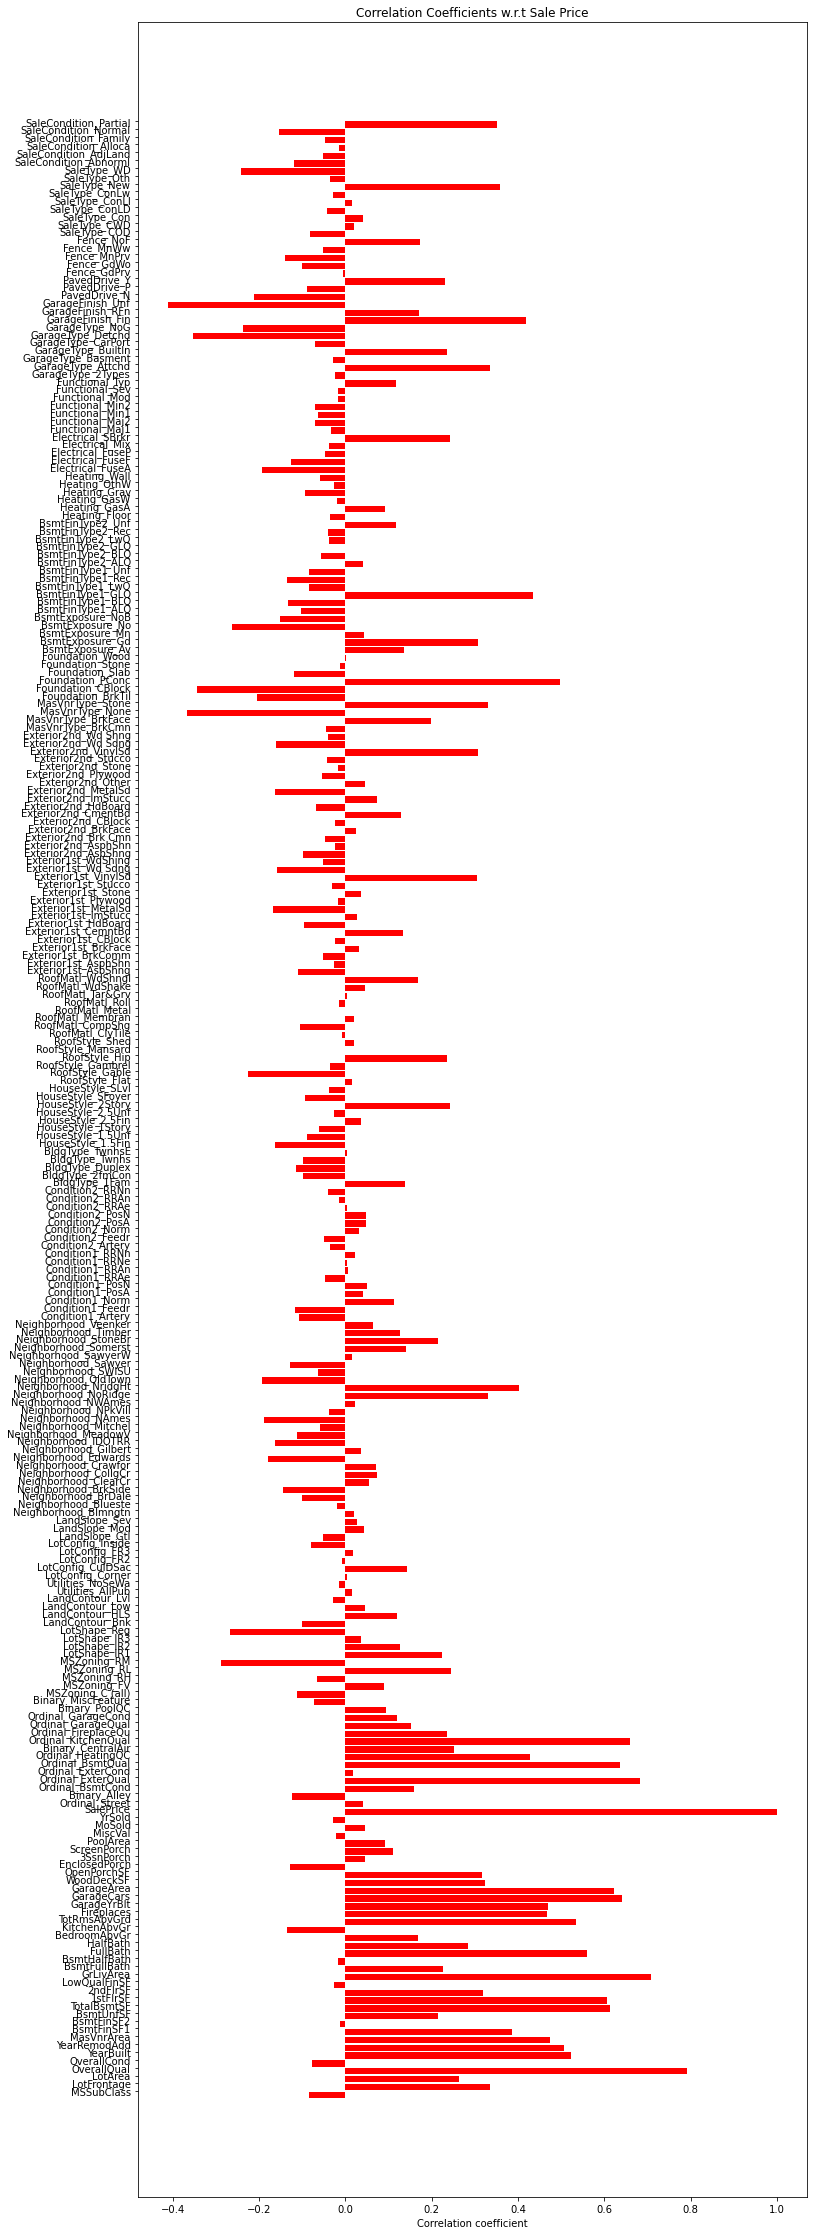

In [33]:
#plotting correlations
num_feat=houses.columns
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(houses[col].values, houses.SalePrice.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

In [34]:
#detecting correlations between two feature which have correlation score above 0.5 

correlations=houses.corr()
attrs = correlations # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]).unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key])
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.loc[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

Attribute Pair  Correlation
42         (Utilities_AllPub, Utilities_NoSeWa)    -1.000000
55                    (Binary_PoolQC, PoolArea)     0.989665
98        (SaleCondition_Partial, SaleType_New)     0.986819
89   (Exterior1st_VinylSd, Exterior2nd_VinylSd)     0.977525
103  (Exterior1st_CemntBd, Exterior2nd_CmentBd)     0.974171
..                                          ...          ...
57            (GarageCars, Ordinal_KitchenQual)     0.509810
73                    (SalePrice, YearRemodAdd)     0.507101
124    (Ordinal_HeatingQC, Ordinal_KitchenQual)     0.504228
125          (GarageYrBlt, Ordinal_KitchenQual)     0.503115
97                     (2ndFlrSF, BedroomAbvGr)     0.502901

[148 rows x 2 columns]

In [35]:
#see the corelations of OverallQual and SalePrice
houses[['OverallQual','SalePrice']].groupby(['OverallQual'],
as_index=False).mean().sort_values(by='OverallQual', ascending=False)

OverallQual      SalePrice
9           10  438588.388889
8            9  367513.023256
7            8  274735.535714
6            7  207716.423197
5            6  161603.034759
4            5  133523.347607
3            4  108420.655172
2            3   87473.750000
1            2   51770.333333
0            1   50150.000000

In [36]:
#see the corelations of TotRmsAbvGrd and SalePrice
houses[['TotRmsAbvGrd','SalePrice']].groupby(['TotRmsAbvGrd'],
as_index=False).mean().sort_values(by='TotRmsAbvGrd', ascending=False)

TotRmsAbvGrd      SalePrice
11            14  200000.000000
10            12  280971.454545
9             11  318022.000000
8             10  296279.170213
7              9  252988.173333
6              8  213427.529412
5              7  196666.784195
4              6  161303.296020
3              5  141550.749091
2              4  122844.628866
1              3  111217.647059
0              2   39300.000000

In [37]:
#see the corelations of GarageCars and SalePrice
houses[['GarageCars','SalePrice']].groupby(['GarageCars'],
as_index=False).mean().sort_values(by='GarageCars', ascending=False)

GarageCars      SalePrice
4           4  192655.800000
3           3  309636.121547
2           2  183851.663835
1           1  128116.688347
0           0  103317.283951

In [38]:
# Normalize the data.
houses_min = houses.min()
houses_max = houses.max()
normalized_houses=(houses-houses.min())/(houses.max()-houses.min())

In [39]:
y = normalized_houses['SalePrice']
X = normalized_houses.drop("SalePrice", axis = 1)
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)


In [40]:
#import packages for XGBoost model
import xgboost as xgb

In [41]:
#read the test data
#houses_test = pd.read_csv('./Data/test.csv')

In [42]:
#see the NaNs of test data
test_X.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 251, dtype: int64

In [43]:
#creation of XGBoost model 

model_xgb = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                            max_depth = 7, alpha = 5)

In [44]:
#fit the model and get prediction of model

model_xgb.fit(train_X, train_y)
preds_xgb = model_xgb.predict(test_X)


In [45]:
#see the predictions

preds_xgb

array([0.25435543, 0.15370163, 0.18027733, 0.23362042, 0.13522966,
       0.3293924 , 0.3656502 , 0.15747403, 0.13513623, 0.15535003,
       0.15323596, 0.28300956, 0.16421331, 0.11781525, 0.25752452,
       0.20956232, 0.14809276, 0.4031963 , 0.26569512, 0.17573474,
       0.13300744, 0.20649043, 0.11202151, 0.15770926, 0.24060579,
       0.15207607, 0.21682484, 0.19619176, 0.11771087, 0.1360768 ,
       0.13450995, 0.22644556, 0.1436524 , 0.24420486, 0.48533168,
       0.21811263, 0.1620326 , 0.39908394, 0.19989333, 0.11166009,
       0.14430329, 0.24984547, 0.17483415, 0.20267752, 0.23881766,
       0.1120639 , 0.34746602, 0.31940833, 0.30325934, 0.11758024,
       0.22084855, 0.21746817, 0.15157646, 0.16487694, 0.11792441,
       0.15712404, 0.14510784, 0.15775107, 0.26901478, 0.4567657 ,
       0.1169848 , 0.3896869 , 0.19474229, 0.19049819, 0.22180913,
       0.12536818, 0.13260156, 0.25206017, 0.2596286 , 0.11799653,
       0.15452495, 0.20749056, 0.18008047, 0.3205597 , 0.19487

In [46]:
rmse = np.sqrt(MSE(test_y, preds_xgb))
print("RMSE : % f" %(rmse))

RMSE :  0.047111


In [47]:
#import packages for Support Vector Machine model

from sklearn.svm import SVR

#creation of SVM model

model_svm = SVR(kernel = 'poly')

#fit the SVM model

model_svm.fit(train_X, train_y.values.ravel())

#get and see the prediction of the SVM model

preds_svm=model_svm.predict(test_X)

# Calculate RMSE
rmse = np.sqrt(MSE(test_y, preds_svm))
print("RMSE : % f" %(rmse))

RMSE :  0.057991


In [48]:
#import packages for Random Forest model

from sklearn.ensemble import RandomForestRegressor as rfg

#creation of model for Random Forest model

model_rfg = rfg(n_estimators = 1000, random_state = 20 )

#fit the model and get predictions

model_rfg.fit(train_X, train_y.values.ravel())
preds_rfg = model_rfg.predict(test_X)

# Calculate RMSE
rmse = np.sqrt(MSE(test_y, preds_rfg))
print("RMSE : % f" %(rmse))

RMSE :  0.036052


In [49]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

#Creation of model
model_gbr = GradientBoostingRegressor(n_estimators=20, 
                                      learning_rate=0.1, 
                                      max_depth=1) 

#fit the model and get predictions

model_gbr.fit(train_X, train_y.values.ravel())
preds_gbr = model_gbr.predict(test_X)

# Calculate RMSE
rmse = np.sqrt(MSE(test_y, preds_gbr))
print("RMSE : % f" %(rmse))

RMSE :  0.061730


We now have four models with varying RMSEs before combining them in an ensemble model lets see if we can imrpove their RMSE's with PCA.

In [50]:
from sklearn.decomposition import PCA
pca=PCA()
PCA_train_X = pca.fit_transform(train_X)

In [51]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:]

array([ 12.89,  19.33,  23.6 ,  27.55,  30.89,  34.05,  36.75,  39.21,
        41.6 ,  43.91,  46.09,  48.23,  50.24,  52.08,  53.84,  55.52,
        57.12,  58.61,  60.02,  61.33,  62.6 ,  63.82,  65.  ,  66.07,
        67.11,  68.11,  69.07,  69.99,  70.86,  71.71,  72.54,  73.34,
        74.1 ,  74.83,  75.55,  76.22,  76.87,  77.5 ,  78.11,  78.7 ,
        79.26,  79.81,  80.35,  80.87,  81.38,  81.86,  82.33,  82.79,
        83.24,  83.67,  84.1 ,  84.52,  84.92,  85.31,  85.68,  86.05,
        86.41,  86.76,  87.1 ,  87.43,  87.75,  88.06,  88.37,  88.67,
        88.95,  89.23,  89.51,  89.78,  90.04,  90.3 ,  90.56,  90.81,
        91.05,  91.29,  91.52,  91.75,  91.97,  92.19,  92.4 ,  92.6 ,
        92.8 ,  92.99,  93.18,  93.36,  93.54,  93.71,  93.88,  94.04,
        94.2 ,  94.36,  94.51,  94.65,  94.79,  94.93,  95.07,  95.2 ,
        95.33,  95.46,  95.58,  95.7 ,  95.82,  95.93,  96.04,  96.15,
        96.26,  96.36,  96.46,  96.56,  96.66,  96.76,  96.85,  96.94,
      

It seems like we can capture all of the variety in the data with 201 features, this is not a small number but eliminating 50 features without a cost could increase our performance.

In [52]:
PCA_test_X = pca.fit_transform(test_X)

In [53]:
#fit the XG Boost model and see RMSE of model

model_xgb.fit(PCA_train_X[:,:201], train_y)
PCA_preds_xgb = model_xgb.predict(PCA_test_X[:,:201])

rmse = np.sqrt(MSE(test_y, PCA_preds_xgb))
print("RMSE : % f" %(rmse))

RMSE :  0.090426


In [54]:
#fit the SVM model

model_svm.fit(PCA_train_X[:,:201], train_y.values.ravel())

#get and see the prediction of the SVM model

PCA_preds_svm=model_svm.predict(PCA_test_X[:,:201])

# Calculate RMSE
rmse = np.sqrt(MSE(test_y, PCA_preds_svm))
print("RMSE : % f" %(rmse))

RMSE :  0.094988


In [55]:
#fit the Random Forest  and get predictions

model_rfg.fit(PCA_train_X[:,:201], train_y.values.ravel())
PCA_preds_rfg = model_rfg.predict(PCA_test_X[:,:201])

# Calculate RMSE
rmse = np.sqrt(MSE(test_y, PCA_preds_rfg))
print("RMSE : % f" %(rmse))

RMSE :  0.088877


It seems like PCA did not improve out performance, lets try eliminating useless features.

In [56]:
from sklearn.feature_selection import VarianceThreshold
# Remove features with 0 variance.
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(train_X)
len(train_X.columns[constant_filter.get_support()])

246

In [57]:
# Remove duplicate features
train_features_T = train_X.T
train_features_T.shape
# Find duplicate features
print(train_features_T.duplicated().sum())

6


In [58]:
unique_train_X = train_features_T.drop_duplicates(keep='first').T
unique_train_X.shape

(1022, 245)

In [59]:
correlated_features = set()
correlation_matrix = unique_train_X.corr()
correlation_matrix

MSSubClass  LotFrontage   LotArea  OverallQual  \
MSSubClass               1.000000    -0.347414 -0.128234     0.012387   
LotFrontage             -0.347414     1.000000  0.351524     0.258526   
LotArea                 -0.128234     0.351524  1.000000     0.119127   
OverallQual              0.012387     0.258526  0.119127     1.000000   
OverallCond             -0.018605    -0.056331 -0.012136    -0.060721   
...                           ...          ...       ...          ...   
SaleCondition_AdjLand    0.007941    -0.021228 -0.015356    -0.054402   
SaleCondition_Alloca     0.027022    -0.013142 -0.002371    -0.037024   
SaleCondition_Family     0.024557    -0.027090 -0.017278    -0.013508   
SaleCondition_Normal     0.016932    -0.088886 -0.005082    -0.139858   
SaleCondition_Partial   -0.064120     0.159939  0.040633     0.322663   

                       OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
MSSubClass               -0.018605   0.015858      0.026446    0.013573   
LotFrontage              -0.056331   0.128215      0.096991    0.216551   
LotArea                  -0.012136   0.026058     -0.005240    0.080932   
OverallQual              -0.060721   0.578470      0.540445    0.418453   
OverallCond               1.000000  -0.357318      0.120001   -0.119746   
...                            ...        ...           ...         ...   
SaleCondition_AdjLand    -0.043749  -0.062392     -0.047008   -0.031106   
SaleCondition_Alloca     -0.006776  -0.017657     -0.020633   -0.011758   
SaleCondition_Family     -0.016273  -0.034571     -0.048358    0.010774   
SaleCondition_Normal      0.163575  -0.162496     -0.098103   -0.089978   
SaleCondition_Partial    -0.147666   0.353168      0.318404    0.158095   

                       BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
MSSubClass              -0.064677   -0.063177  ...       -0.002766   
LotFrontage              0.248817    0.064816  ...       -0.041317   
LotArea                  0.224743    0.160321  ...       -0.009798   
OverallQual              0.266330   -0.042467  ...       -0.028974   
OverallCond             -0.042930    0.027914  ...       -0.027905   
...                           ...         ...  ...             ...   
SaleCondition_AdjLand   -0.038637   -0.015317  ...       -0.002944   
SaleCondition_Alloca    -0.009874   -0.025074  ...       -0.004819   
SaleCondition_Family     0.004313   -0.000527  ...       -0.005914   
SaleCondition_Normal    -0.034729    0.057803  ...        0.025677   
SaleCondition_Partial    0.085612   -0.082496  ...       -0.016551   

                       SaleType_New  SaleType_Oth  SaleType_WD  \
MSSubClass                -0.055748     -0.017756     0.054359   
LotFrontage                0.162734     -0.027087    -0.127681   
LotArea                    0.036926     -0.005870    -0.020013   
OverallQual                0.328547     -0.067116    -0.216864   
OverallCond               -0.153905     -0.059594     0.169045   
...                             ...           ...          ...   
SaleCondition_AdjLand     -0.016237     -0.002944     0.021528   
SaleCondition_Alloca      -0.026581     -0.004819     0.035241   
SaleCondition_Family      -0.032619     -0.005914     0.016749   
SaleCondition_Normal      -0.632355     -0.114656     0.631689   
SaleCondition_Partial      0.981035     -0.016551    -0.748367   

                       SaleCondition_Abnorml  SaleCondition_AdjLand  \
MSSubClass                          0.022319               0.007941   
LotFrontage                        -0.019104              -0.021228   
LotArea                            -0.024527              -0.015356   
OverallQual                        -0.107256              -0.054402   
OverallCond                        -0.065618              -0.043749   
...                                      ...                    ...   
SaleCondition_AdjLand              -0.015488               1.000000   
SaleCondition_Alloca               -0.02535

In [60]:
# Find hihgly correlated features
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [61]:
len(correlated_features)

10

In [62]:
#Remove highly correlated features
unique_train_X.drop(labels=correlated_features, axis=1, inplace=True)

In [63]:
# Lets create remove all those from the test dataframe as well.
removed_features = train_X.drop(unique_train_X.columns, axis = 1)
unique_test_X = test_X.drop(removed_features, axis = 1)

In [64]:
#import packages for XAI method lime and define the explainer for training methods

from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(training_data = np.array(train_X), mode = "regression",
                                             feature_names = train_X.columns, categorical_features = [0])

In [65]:
#fit the XG Boost model and see RMSE of model

model_xgb.fit(unique_train_X, train_y)
UQ_preds_xgb = model_xgb.predict(unique_test_X)

rmse = np.sqrt(MSE(test_y, UQ_preds_xgb))
print("RMSE : % f" %(rmse))

RMSE :  0.046627


In [66]:
#fit the SVM model

model_svm.fit(unique_train_X, train_y.values.ravel())

#get and see the prediction of the SVM model

UQ_preds_svm=model_svm.predict(unique_test_X)

# Calculate RMSE
rmse = np.sqrt(MSE(test_y, UQ_preds_svm))
print("RMSE : % f" %(rmse))

RMSE :  0.057038


In [67]:
#fit the Random Forest  and get predictions

model_rfg.fit(unique_train_X, train_y.values.ravel())
UQ_preds_rfg = model_rfg.predict(unique_test_X)

# Calculate RMSE
rmse = np.sqrt(MSE(test_y, UQ_preds_rfg))
print("RMSE : % f" %(rmse))

RMSE :  0.036035


In [68]:
#fit the Gradiant Boosting Regressor model and get predictions

model_gbr.fit(unique_train_X, train_y.values.ravel())
UQ_preds_gbr = model_gbr.predict(unique_test_X)

# Calculate RMSE
rmse = np.sqrt(MSE(test_y, UQ_preds_gbr))
print("RMSE : % f" %(rmse))

RMSE :  0.061730


All models slightly benefitted from this approach. Lets create an ensemble model.

In [69]:
pred_final = (preds_xgb+(2*UQ_preds_rfg)+UQ_preds_gbr+UQ_preds_svm)/5.0
rmse = np.sqrt(MSE(test_y, pred_final))
print("RMSE : % f" %(rmse))

RMSE :  0.040434


In [70]:
# define explainer

explainer_1 = lime_tabular.LimeTabularExplainer(training_data = np.array(unique_train_X), mode = "regression",
                                             feature_names = train_X.columns, categorical_features = [0])

In [71]:
exp = explainer_1.explain_instance(data_row = unique_test_X.iloc[201],
                                predict_fn = model_svm.predict, num_features = 20)
exp.show_in_notebook(show_table = True)

/Users/bakolas/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"


In [72]:
exp = explainer_1.explain_instance(data_row = unique_test_X.iloc[201],
                                predict_fn = model_gbr.predict, num_features = 20)
exp.show_in_notebook(show_table = True)

/Users/bakolas/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [73]:
exp = explainer_1.explain_instance(data_row = unique_test_X.iloc[201],
                                predict_fn = model_xgb.predict, num_features = 20)
exp.show_in_notebook(show_table = True)

In [74]:
exp = explainer_1.explain_instance(data_row = unique_test_X.iloc[201],
                                predict_fn = model_rfg.predict, num_features = 20)
exp.show_in_notebook(show_table = True)

/Users/bakolas/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [131]:
# Last test with better hyper parameters.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
model_xgb = xgb.XGBRegressor(n_estimators=268, 
                               learning_rate=0.05, 
                               max_depth = 5, 
                               min_child_weight=1, 
                               subsample=1.0, 
                               colsample_bytree=1.0)
model_svm = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))
model_rfg = rfg(n_estimators=1000,
                          max_depth=50)
model_gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

In [108]:
#fit the XG Boost model and see RMSE of model

model_xgb.fit(unique_train_X, train_y)
UQ_preds_xgb = model_xgb.predict(unique_test_X)

rmse = np.sqrt(MSE(test_y, UQ_preds_xgb))
print("RMSE : % f" %(rmse))

RMSE :  0.034329


In [109]:
model_svm.fit(unique_train_X, train_y.values.ravel())

#get and see the prediction of the SVM model

UQ_preds_svm=model_svm.predict(unique_test_X)

# Calculate RMSE
rmse = np.sqrt(MSE(test_y, UQ_preds_svm))
print("RMSE : % f" %(rmse))

RMSE :  0.033565


In [132]:
#fit the Random Forest  and get predictions

model_rfg.fit(unique_train_X, train_y.values.ravel())
UQ_preds_rfg = model_rfg.predict(unique_test_X)

# Calculate RMSE
rmse = np.sqrt(MSE(test_y, UQ_preds_rfg))
print("RMSE : % f" %(rmse))

RMSE :  0.035956


In [87]:
#fit the Gradiant Boosting Regressor model and get predictions

model_gbr.fit(unique_train_X, train_y.values.ravel())
UQ_preds_gbr = model_gbr.predict(unique_test_X)

# Calculate RMSE
rmse = np.sqrt(MSE(test_y, UQ_preds_gbr))
print("RMSE : % f" %(rmse))

RMSE :  0.032174


In [133]:
pred_final = (preds_xgb+UQ_preds_rfg+UQ_preds_gbr+UQ_preds_svm)/4.0
rmse = np.sqrt(MSE(test_y, pred_final))
print("RMSE : % f" %(rmse))

RMSE :  0.033885


In [134]:
fresults = { "Model" : ["XGB","SVM","RF","GBR", "Voting"] , "RMSE" : [0.034329, 0.033565, 0.035956, 0.032174, 0.033885  ]}
results = { "Model" : ["XGB","SVM","RF","GBR", "Voting"] , "RMSE" : [0.046627, 0.057038, 0.036035, 0.061730, 0.040434  ]}

<AxesSubplot:xlabel='Model', ylabel='RMSE'>

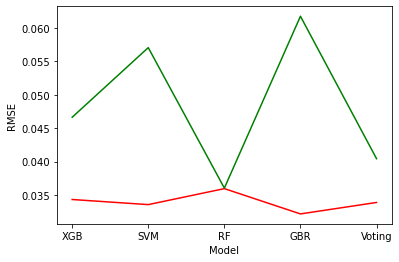

In [135]:
sns.lineplot(data=fresults, x='Model', y='RMSE', color="red")
sns.lineplot(data=results, x='Model', y='RMSE', color="green")

Our final best result is GBR with 0.033565 RMSE.

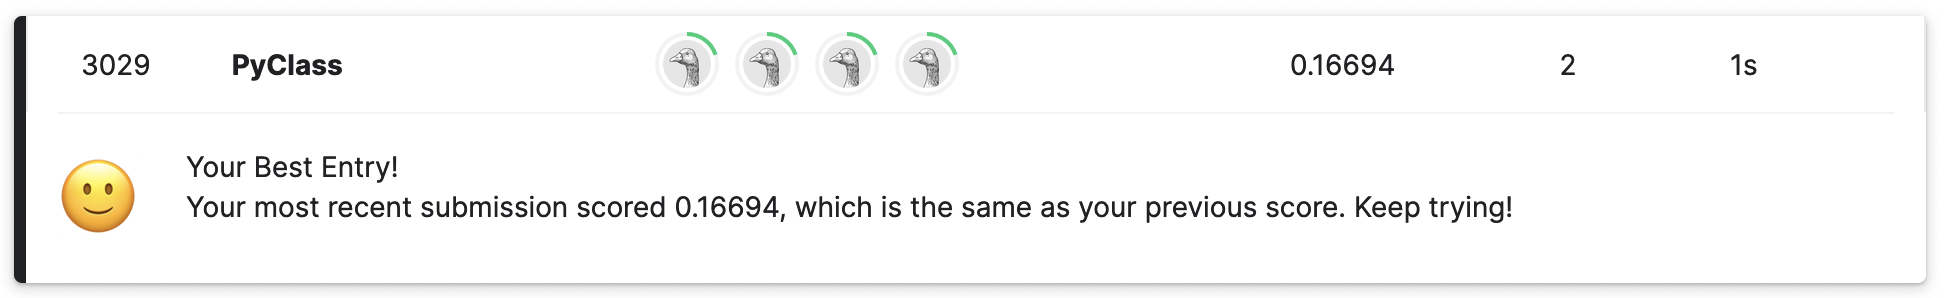

Not bad for our first competition submission.